<a href="https://colab.research.google.com/github/kirsten-fung/project_gss/blob/main/graph_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [643]:
! git clone https://github.com/kirsten-fung/project_gss

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/project_gss/cleaned_project_gss.csv')
# print(df.head())
# print(df.info())
# print(df.describe())

fatal: destination path 'project_gss' already exists and is not an empty directory.


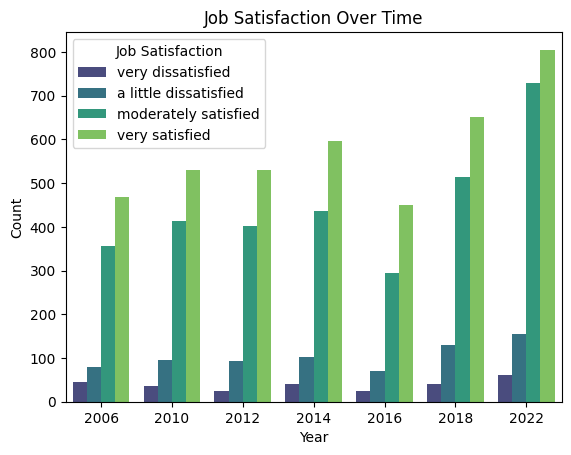

In [644]:
# Countplot of job satisfaction
sat_order = ['very dissatisfied','a little dissatisfied','moderately satisfied','very satisfied']
plot_palette = sns.color_palette("viridis", len(sat_order))
count_plot = sns.countplot(data=df, x='year', hue='job_satisfaction',hue_order=sat_order,palette=plot_palette)
count_plot.set_title('Job Satisfaction Over Time')
count_plot.set_xlabel('Year')
count_plot.set_ylabel('Count')
plt.legend(title='Job Satisfaction')
plt.show()

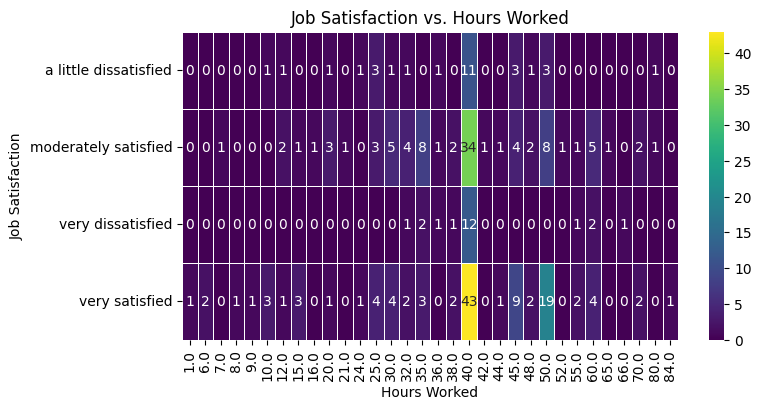

In [645]:
# Heatmap of Job Satisfaction vs. Hours Worked
heatmap_data = df.pivot_table(index='job_satisfaction', columns='hours_worked', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 4))
heatmap = sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', linewidths=0.5)
heatmap.set_title('Job Satisfaction vs. Hours Worked')
heatmap.set_xlabel('Hours Worked')
heatmap.set_ylabel('Job Satisfaction')
plt.show()

<ipython-input-646-2f07f11083d4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)
<ipython-input-646-2f07f11083d4>:5: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)


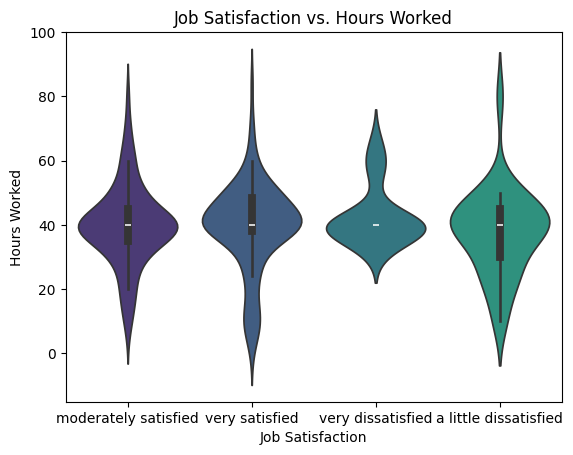

In [646]:
# Violin plot of job satisfaction vs. hours worked
category = 'job_satisfaction'
values = 'hours_worked'
plot_palette = sns.color_palette("viridis")
voilin_plot = sns.violinplot(data=df,x=category,y=values,palette=plot_palette)
voilin_plot.set_title('Job Satisfaction vs. Hours Worked')
voilin_plot.set_xlabel('Job Satisfaction')
voilin_plot.set_ylabel('Hours Worked')
plt.show()

In [647]:
# Recode job satisfaction string to numeric
df['job_satisfaction'] = df['job_satisfaction'].replace(['very satisfied'], 4)
df['job_satisfaction'] = df['job_satisfaction'].replace(['moderately satisfied'], 3)
df['job_satisfaction'] = df['job_satisfaction'].replace(['a little dissatisfied'], 2)
df['job_satisfaction'] = df['job_satisfaction'].replace(['very dissatisfied'], 1)

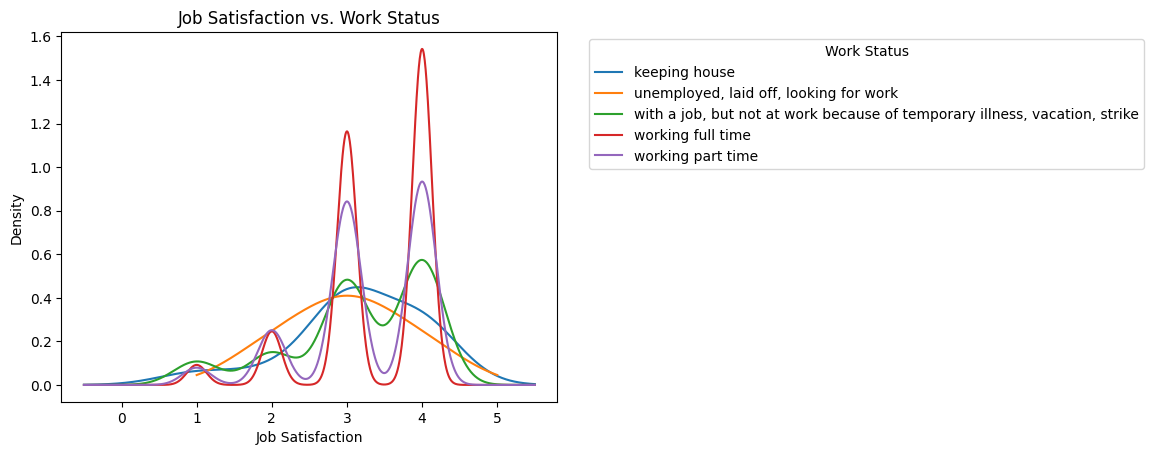

In [648]:
# Kernal density plot of job satisfaction vs. work status
df1 = df.pivot(columns='work_status',values='job_satisfaction')
df1.plot.density()
plt.title('Job Satisfaction vs. Work Status')
plt.xlabel('Job Satisfaction')
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

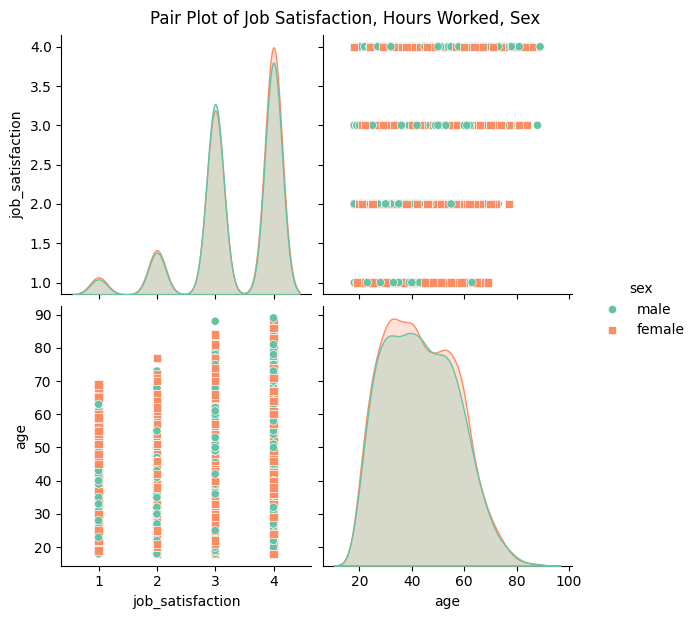

In [649]:
# Pairplot
df2 = df[['job_satisfaction','sex','age']]
pair_plot = sns.pairplot(df2, hue='sex', palette='Set2', markers=['o','s'],diag_kind='kde', height=3)
pair_plot.fig.suptitle('Pair Plot of Job Satisfaction, Hours Worked, Sex', y=1.02)
plt.show()

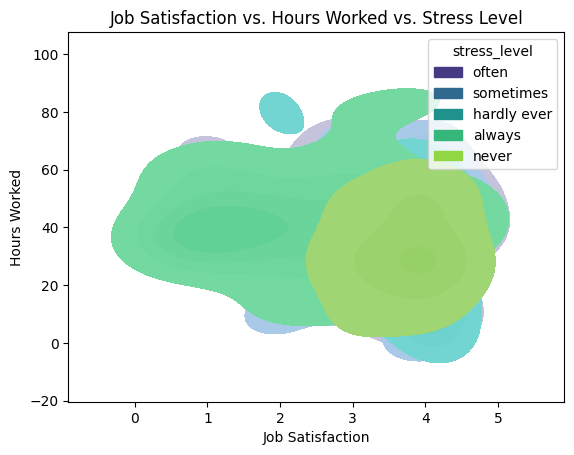

In [650]:
# Kernal density plot
kde_plot = sns.kdeplot(data=df, x='job_satisfaction', y='hours_worked', hue='stress_level', fill=True, palette='viridis')
kde_plot.set_title('Job Satisfaction vs. Hours Worked vs. Stress Level')
kde_plot.set_xlabel('Job Satisfaction')
kde_plot.set_ylabel('Hours Worked')
plt.show()

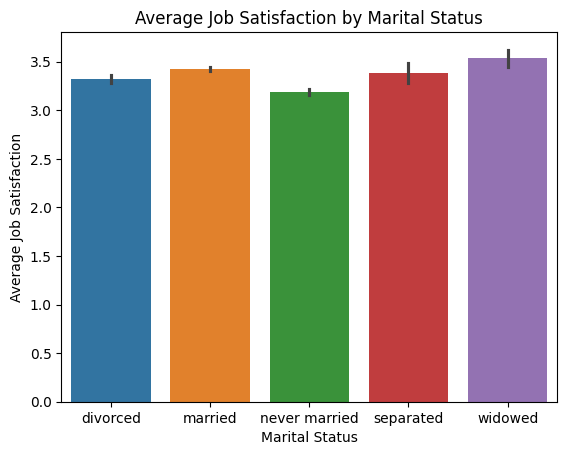

In [651]:
barplot_marital = sns.barplot(x='marital_status', y='job_satisfaction', hue='marital_status', data=df, dodge=False)
barplot_marital.set_title('Average Job Satisfaction by Marital Status')
barplot_marital.set_xlabel('Marital Status')
barplot_marital.set_ylabel('Average Job Satisfaction')
plt.show()